In [98]:
# IMPORTS FOR ALL THE PROJECT
import numpy as np
import os
import requests
from numpy.random import default_rng
import matplotlib
import matplotlib.pyplot as plt
import tarfile
from six.moves import urllib
import pandas as pd



In [99]:
# PATH TO THE FILES

urls= ['https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/general_data.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/manager_survey_data.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/employee_survey_data.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/in_time.csv',
       'https://raw.githubusercontent.com/Plexiglace-EL/projet-IA/main/out_time.csv']

paths = ['./datasets/general_data.csv',
         './datasets/manager_survey_data.csv',
         './datasets/employee_survey_data.csv',
         './datasets/in_time.csv',
         './datasets/out_time.csv']

In [100]:

def fetch_datas(url, path):
    localfile, header = urllib.request.urlretrieve(url, path)
    print(localfile)
    return localfile

def extractZip(path):
    with tarfile.open(path) as tf:
        tf.extractall('./datasets')


In [102]:
def import_all_files():
    print('==='*4, "BEGIN", '==='*4)


    if not os.path.exists('./datasets/'):
        print('==='*4, "CREATING \"./datasets/\" DIRECTORY", '==='*4)
        os.mkdir('./datasets')

    for i, url in enumerate(urls):
        fetch_datas(urls[i], paths[i])

    print('==='*4, "FINISHED", '==='*4)

In [103]:
def load_datas(path):
    datas = pd.read_csv(path)
    return datas

In [104]:
# FUNCTION TO DOWNLOAD THE FILES FROM ONLINE REPO TO LOCAL FOLDER

import_all_files()

============ BEGIN ============
./datasets/general_data.csv
./datasets/manager_survey_data.csv
./datasets/employee_survey_data.csv
./datasets/in_time.csv
./datasets/out_time.csv
============ FINISHED ============


In [105]:
# IMPORTING DATA IN DATAFRAME VARIABLES

general = load_datas(paths[0])
manager_survey = load_datas(paths[1])
employee_survey = load_datas(paths[2])
in_time = load_datas(paths[3])
out_time = load_datas(paths[4])

In [106]:
def converting_string_to_dates(in_time, out_time):
    # RENAMING THE UNNAMED COLUMN (ID_EMPLOYEE) FOR IT TO BE USEABLE MORE EASILY IN THE FUTURE

    in_time = in_time.rename(columns={'Unnamed: 0': 'id_employee'})
    out_time = out_time.rename(columns={'Unnamed: 0': 'id_employee'})


    # WE CAN USE THE COLUMNS OF ONLY ONE FILE BECAUSE THEY ARE BOTH THE SAME AND CONTAINS THE SAME HEADERS NAME
    # IT HAS BEEN VERIFIED USING LIST COMPARISON AND UNIQUE() CONDITION TO FILTER AND WE END WITH A TOTAL OF 262 COLUMNS
    cols = in_time.columns


    # CONVERTING THE DATES TO REAL PANDAS DATES OBJECT
    for i in cols:
        if i != 'id_employee':
            in_time[i] = pd.to_datetime(in_time[i])
            out_time[i] = pd.to_datetime(out_time[i])

    return in_time, out_time


In [107]:
print(type(in_time['2015-01-02'][4]), in_time['2015-01-02'][4])
print(type(out_time['2015-01-02'][4]), out_time['2015-01-02'][4])
in_time, out_time = converting_string_to_dates(in_time, out_time)
print(type(in_time['2015-01-02'][4]), in_time['2015-01-02'][4])
print(type(out_time['2015-01-02'][4]), out_time['2015-01-02'][4])

<class 'str'> 2015-01-02 10:28:17
<class 'str'> 2015-01-02 18:31:37
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2015-01-02 10:28:17
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2015-01-02 18:31:37


In [108]:
def calculate_working_time():
    working_time = in_time.copy()
    for i in working_time:
        if i != 'id_employee':
            working_time[i] = out_time[i] - working_time[i]
    return working_time


In [114]:
working_time = calculate_working_time()
working_time

,id_employee,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaT,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,...,NaT,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,NaT,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,2,NaT,0 days 08:06:33,0 days 07:27:17,NaT,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaT,NaT,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,3,NaT,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,NaT,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,4,NaT,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,NaT,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,5,NaT,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,NaT,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaT,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,...,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,NaT,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29
4406,4407,NaT,0 days 06:15:20,NaT,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,...,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,NaT,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51
4407,4408,NaT,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,...,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,NaT,0 days 07:44:04,NaT,0 days 07:45:38,0 days 08:05:25
4408,4409,NaT,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,NaT,0 days 09:17:39,0 days 09:35:59,...,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,NaT,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58


In [123]:
test = working_time.copy()
test = test.drop('id_employee', 1)
test

/var/folders/h0/cy1ln8px4bd1n1wrb07kgdqr0000gn/T/ipykernel_2022/2354046403.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test = test.drop('id_employee', 1)


,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,NaT,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,NaT,...,NaT,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,NaT,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,NaT,0 days 08:06:33,0 days 07:27:17,NaT,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,NaT,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaT,NaT,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,NaT,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,NaT,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,NaT,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,NaT,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,NaT,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,NaT,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,NaT,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,NaT,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,NaT,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaT,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,NaT,...,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,NaT,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29
4406,NaT,0 days 06:15:20,NaT,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,NaT,...,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,NaT,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51
4407,NaT,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,NaT,...,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,NaT,0 days 07:44:04,NaT,0 days 07:45:38,0 days 08:05:25
4408,NaT,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,NaT,0 days 09:17:39,0 days 09:35:59,NaT,...,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,NaT,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58


In [124]:
test.mean(axis= 1)

0      0 days 07:22:25.142241379
1      0 days 07:43:08.288135593
2      0 days 07:00:47.665289256
3      0 days 07:11:37.242553191
4      0 days 08:00:22.228571428
                  ...           
4405   0 days 08:31:20.197530864
4406   0 days 06:05:34.634854771
4407   0 days 07:42:23.874458874
4408   0 days 09:29:33.340248962
4409   0 days 06:59:20.211206896
Length: 4410, dtype: timedelta64[ns]

In [152]:
working_time['mean'] = test.mean(axis = 1)
working_time.drop(working_time.columns.difference(['id_employee','mean']), 1, inplace=True)
working_time['mean'] = working_time['mean'].dt.total_seconds() / 3600
working_time['mean'] = round(working_time['mean'], 2)
working_time


/var/folders/h0/cy1ln8px4bd1n1wrb07kgdqr0000gn/T/ipykernel_2022/4283647258.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  working_time.drop(working_time.columns.difference(['id_employee','mean']), 1, inplace=True)


,id_employee,mean
0,1,7.37
1,2,7.72
2,3,7.01
3,4,7.19
4,5,8.01
...,...,...
4405,4406,8.52
4406,4407,6.09
4407,4408,7.71
4408,4409,9.49


(array([811., 737., 721., 779., 324., 223., 204., 178., 230., 203.]),
 array([ 5.95 ,  6.458,  6.966,  7.474,  7.982,  8.49 ,  8.998,  9.506,
        10.014, 10.522, 11.03 ]),
 <BarContainer object of 10 artists>)

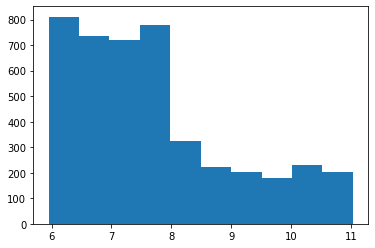

In [153]:
plt.hist(working_time['mean'])